All system models inherit from the `Network` base class.

In [1]:
import tensorflow as tf

/home/neuro/miniconda3/envs/func-neurarch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/neuro/miniconda3/envs/func-neurarch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/neuro/miniconda3/envs/func-neurarch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/neuro/miniconda3/en

In [2]:
from fna.tools.network_architect import Network
[func for func in dir(Network) if callable(getattr(Network, func)) and not func.startswith("__")]

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.


['initialize_states', 'predict', 'report', 'train']

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from fna.tasks.symbolic.sequences import SymbolicSequencer
from fna.tasks.preprocessing import ImageFrontend
from fna.networks.rnn.helper import prepare_symbolic_batch

[utils.py:141 - INFO] NumExpr defaulting to 8 threads.


# **9. Artificial Neural Networks (ANN)**

In [4]:
from fna.networks.ann import ArtificialNeuralNetwork

This category comprises engineered systems that operate in discrete time and whose states follow:

$$\mathbf{x}_{t} = \mathrm{F}(\mathbf{x}_{t-1}, \mathbf{u}_{t}) $$

All ANNs are implemented in `Tensorflow` and are fully trainable models (all weights and biases are trainable parameters)

## 9.1. Implemented models

All weights and biases are trainable parameters

### 9.1.1. *Vanilla* RNN

$$\mathbf{x}_{t}=f\left(\mathbf{W}^{\mathrm{rec}} \mathbf{x}_{t-1}+\mathbf{W}^{\mathrm{in}} \mathbf{u}_{t}+\mathbf{b}^{\mathrm{in}}\right)$$

In [5]:
vrnn_params = {
    'N': 500,
    'cell_type': 'Vanilla',
    'learning_rate': 1e-2
}

Note: if recurrent weights are sparse and scalled to unit spectral radius, this is an ESN.

### 9.1.2. Long Short-Term Memory (LSTM)

$$\mathbf{x}_{t}=\left[\begin{array}{c}{\mathbf{c}_{t}} \\ {\widetilde{\mathbf{h}}_{t}}\end{array}\right]$$

$$\widetilde{\mathbf{h}}_{t}=f\left(\mathbf{c}_{t}\right) \cdot \sigma\left(\mathbf{W}^{\mathrm{rec}} \mathbf{x}+\mathbf{W}^{\mathrm{in}} \mathbf{u}+\mathbf{b}^{\mathrm{u}}\right)$$

$$\mathbf{c}_{t}=\mathbf{f}\cdot \mathbf{c}_{t-1}+\mathbf{i} \cdot \sigma\left(\mathbf{W}^{\mathrm{ch}} \widetilde{\mathbf{h}}_{t-1}+\mathbf{W}^{\mathrm{cu}} \mathbf{u}+\mathbf{b}^{c}\right)$$

$$\mathbf{i}=\sigma\left(\mathbf{W}^{\mathrm{ih}} \mathbf{h}+\mathbf{W}^{\mathrm{iu}} \mathbf{u}+\mathbf{b}^{\mathrm{i}}\right)$$

$$\mathbf{f}=\sigma\left(\mathbf{W}^{\mathrm{fh}} \mathbf{h}+\mathbf{W}^{\mathrm{fu}} \mathbf{u}+\mathbf{b}^{\mathrm{f}}+\mathbf{b}^{\mathrm{f g}}\right)$$

In [6]:
lstm_params = {
    'N': 500,
    'cell_type': 'LSTM',
    'learning_rate': 1e-2
}

### 9.1.3. Gated Recurrent Unit (GRU)
​
$$\mathbf{h}_{t}=\mathbf{g} \cdot \mathbf{h}_{t-1}+(1-\mathbf{g}) \cdot \mathbf{c}$$
​
$$\mathbf{c}=f\left(\mathbf{W}^{\mathrm{ch}} \mathbf{h}_{t-1}+\mathbf{W}^{\mathrm{cu}} \mathbf{u}_{t}+\mathbf{b}^{\mathrm{c}}\right)$$
​
$$\mathbf{g}=\sigma\left(\mathbf{W}^{\mathrm{gh}} \mathbf{h}_{t-1}+\mathbf{W}^{\mathrm{gu}} \mathbf{u}_{t}+\mathbf{b}^{\mathrm{g}}+b^{f g}\right)$$

In [7]:
gru_params = {
    'N': 500,
    'cell_type': 'GRU',
    'learning_rate': 1e-2
}

### 9.1.4. Update-Gated RNN (UGRNN)

$$\mathbf{h}_{t}=\mathbf{g} \cdot \mathbf{h}_{t-1}+(1-\mathbf{g}) \cdot \mathbf{c}$$

$$\mathbf{c}=f\left(\mathbf{W}^{\mathrm{ch}} \mathbf{h}_{t-1}+\mathbf{W}^{\mathrm{cu}} \mathbf{u}_{t}+\mathbf{b}^{\mathrm{c}}\right)$$

$$\mathbf{g}=\sigma\left(\mathbf{W}^{\mathrm{gh}} \mathbf{h}_{t-1}+\mathbf{W}^{\mathrm{gu}} \mathbf{u}_{t}+\mathbf{b}^{\mathrm{g}}+b^{f g}\right)$$

In [8]:
ugrnn_params = {
    'N': 500,
    'cell_type': 'UGRNN',
    'learning_rate': 1e-2
}

## 9.2. Training

* Standard supervised learning (`AdagradOptimizer` on MSE between output and target)
* Can be used *passively* by setting the learning rate to 0
* External decoders can be added (see below)

### 9.2.1. Symbolic tasks

We will the MNIST task as an example:

In [9]:
vocabulary = 5
batch_size = 100
n_batches = 2
n_epochs = 5

In [10]:
# discrete sequencers
sequencer = SymbolicSequencer(label='random sequence', set_size=vocabulary)
image_mnist = ImageFrontend(path='../../../data/mnist/', label='mnist', vocabulary=sequencer.tokens)

[sequences.py:91 - INFO] Generating symbolic sequencer
[preprocessing.py:89 - INFO] MNIST target directory is not empty! Loading existing data...
[preprocessing.py:54 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=70000


In [11]:
example_ann = 'lstm'
rnn = ArtificialNeuralNetwork(label=example_ann, network_parameters=eval("{}_params".format(example_ann)), input_dim=image_mnist.dimensions, output_dim=len(sequencer.tokens))

[ann_network.py:36 - INFO] Initializing lstm architecture (TensorFlow-simulated)
[ann_network.py:74 - INFO] Creating populations:
[ann_network.py:75 - INFO] - Population LSTM [N=500]
[ann_network.py:105 - INFO] ========================================================
[ann_network.py:106 - INFO]  lstm architecture (TensorFlow-simulated):
[ann_network.py:107 - INFO] --------------------------------------------------------
[ann_network.py:108 - INFO] - Size: 500
[ann_network.py:109 - INFO] - Neuron models: LSTM


In [12]:
train_batch = prepare_symbolic_batch(simulator=rnn.simulator, n_batches=n_batches, batch_size=batch_size,
                                     sequencer=sequencer, discrete_embedding=image_mnist, as_tensor=False)
train_results = rnn.train(train_batch, n_epochs=n_epochs, verbose=True, save=False)

# test
test_batch = prepare_symbolic_batch(simulator=rnn.simulator, n_batches=n_batches, batch_size=batch_size,
                                    sequencer=sequencer, discrete_embedding=image_mnist, as_tensor=False)
test_results, decoder_accuracy = rnn.test(test_batch, output_parsing='k-WTA', symbolic=True, verbose=True, save=False)


Generating batches: 100%|██████████| 2/2 [00:00<00:00, 566.26it/s]
[ann_network.py:185 - INFO] Running TF session on /cpu:0
[ann_network.py:211 - INFO] Epoch 1 loss: 0.22857992351055145
[ann_network.py:211 - INFO] Epoch 2 loss: 0.1695692539215088
[ann_network.py:211 - INFO] Epoch 3 loss: 0.1661936640739441
[ann_network.py:211 - INFO] Epoch 4 loss: 0.16421252489089966
[ann_network.py:211 - INFO] Epoch 5 loss: 0.16238103806972504
Generating batches: 100%|██████████| 2/2 [00:00<00:00, 480.31it/s]
[ann_network.py:256 - INFO] Running TF session on /cpu:0


Text(0, 0.5, 'Training Loss')

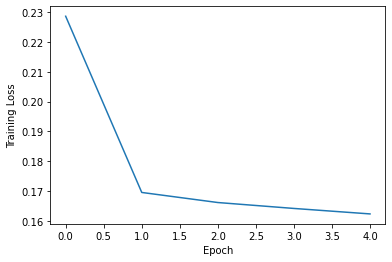

In [13]:
# plot training loss
loss = train_results['losses']
fig, ax = plt.subplots()
ax.plot(loss)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

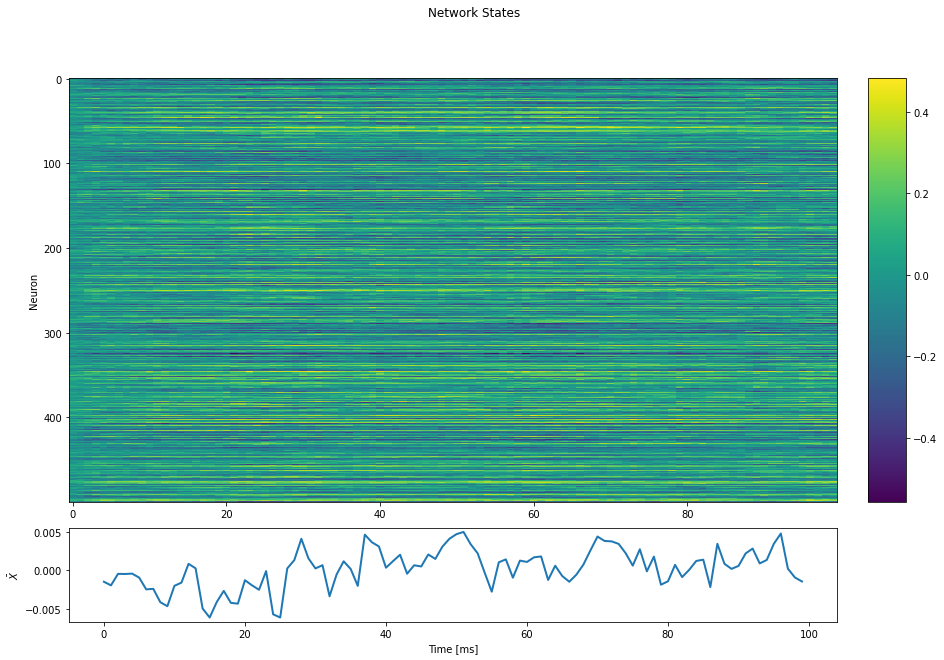

In [14]:
from fna.tools.visualization.plotting import plot_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

state_matrix = train_results['states'][-1][-1, :, :].T


fig, (ax11, ax12) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [18, 4], 'hspace': 0.1}, sharex=False, figsize=(15, 10))
fig.suptitle("Network States")
_, ax11 = plot_matrix(state_matrix, ax=ax11, save=False, display=False, data_label=None)
ax11.set_ylabel('Neuron')
ax12.plot(state_matrix.mean(0), lw=2)
divider2 = make_axes_locatable(ax12)
cax2 = divider2.append_axes("right", size="5%", pad="4%")
cax2.remove()
ax12.set_xlabel("Time [ms]")
ax12.set_ylabel(r"$\bar{X}$")
plt.show()

### 9.2.2. Analog tasks

Continuous integration as example

In [15]:
from fna.networks.rnn.helper import prepare_analog_batch
from fna.tasks.symbolic.embeddings import VectorEmbeddings

In [16]:
# task parameters
n_epochs = 10
n_batches = 5
batch_size = 100

sequencer = SymbolicSequencer(label='random sequence', alphabet=['A', 'B'], eos='#')
embedding = VectorEmbeddings(vocabulary=sequencer.tokens).one_hot()
embedding.stimulus_set.update({'#': np.zeros_like(embedding.stimulus_set['A']),
                               'B': -1*embedding.stimulus_set['B']})

[sequences.py:91 - INFO] Generating symbolic sequencer


In [17]:
tf.keras.backend.clear_session()
tf.reset_default_graph()
rnn = ArtificialNeuralNetwork(label=example_ann, network_parameters=eval("{}_params".format(example_ann)), input_dim=1, output_dim=1)

[ann_network.py:36 - INFO] Initializing lstm architecture (TensorFlow-simulated)
[ann_network.py:74 - INFO] Creating populations:
[ann_network.py:75 - INFO] - Population LSTM [N=500]
[ann_network.py:105 - INFO] ========================================================
[ann_network.py:106 - INFO]  lstm architecture (TensorFlow-simulated):
[ann_network.py:107 - INFO] --------------------------------------------------------
[ann_network.py:108 - INFO] - Size: 500
[ann_network.py:109 - INFO] - Neuron models: LSTM


In [18]:
train_batch = prepare_analog_batch(rnn.simulator, n_batches=n_batches, batch_size=batch_size, sequencer=sequencer,
                               discrete_embedding=embedding, as_tensor=False)

train_results = rnn.train(train_batch, n_epochs=n_epochs, verbose=True, save=False)

Generating batches: 100%|██████████| 5/5 [00:00<00:00, 120.77it/s]
[ann_network.py:185 - INFO] Running TF session on /cpu:0
[ann_network.py:211 - INFO] Epoch 1 loss: 0.24388204514980316
[ann_network.py:211 - INFO] Epoch 2 loss: 0.22878879308700562
[ann_network.py:211 - INFO] Epoch 3 loss: 0.21923954784870148
[ann_network.py:211 - INFO] Epoch 4 loss: 0.21287642419338226
[ann_network.py:211 - INFO] Epoch 5 loss: 0.20848163962364197
[ann_network.py:211 - INFO] Epoch 6 loss: 0.2053421437740326
[ann_network.py:211 - INFO] Epoch 7 loss: 0.20301665365695953
[ann_network.py:211 - INFO] Epoch 8 loss: 0.2012242078781128
[ann_network.py:211 - INFO] Epoch 9 loss: 0.19978375732898712
[ann_network.py:211 - INFO] Epoch 10 loss: 0.19857794046401978


Text(0, 0.5, 'Training Loss')

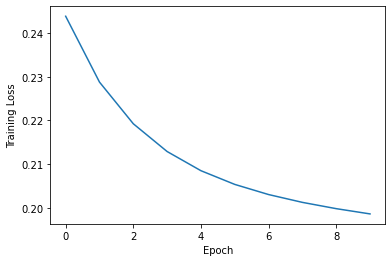

In [19]:
# plot training loss
loss = train_results['losses']
fig, ax = plt.subplots()
ax.plot(loss)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## 9.3. Decoding

Optionally, it may be of interest to couple a set of external decoders / readouts to the system to extend the analysis and/or explicitly compare with other network architectures. To do so, one can pass the optional parameters: 

**Note:** Readouts are trained using scikit-learn (on CPUs), so the addition of a decoding layer may incur in substantial computational costs, compared with running ANNs without them.

In [27]:
extractor_parameters = {
    'hidden': {
        'population': None,
        'variable': 'active',
        'sampling_times': ['stim_offset']}}
decoding_parameters = {
    'reg': {
        'algorithm': "pinv-sgd",
        'extractor': 'hidden',
        'save': True
    },
}
decoder_outputs = {
    'max_memory': 3,
    'max_chunk': 0,
    'max_prediction': 0,
    'chunk_memory': False,
    'chunk_prediction': False}

In [28]:
# discrete sequencers
sequencer = SymbolicSequencer(label='random sequence', set_size=vocabulary)
image_mnist = ImageFrontend(path='../../../data/mnist/', label='mnist', vocabulary=sequencer.tokens)

[sequences.py:91 - INFO] Generating symbolic sequencer
[preprocessing.py:89 - INFO] MNIST target directory is not empty! Loading existing data...
[preprocessing.py:54 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=70000


In [32]:
tf.keras.backend.clear_session()
tf.reset_default_graph()
rnn = ArtificialNeuralNetwork(label=example_ann, network_parameters=eval("{}_params".format(example_ann)), input_dim=image_mnist.dimensions, 
                              output_dim=len(sequencer.tokens), extractors=extractor_parameters, decoders=decoding_parameters)

[ann_network.py:36 - INFO] Initializing lstm architecture (TensorFlow-simulated)
[ann_network.py:74 - INFO] Creating populations:
[ann_network.py:75 - INFO] - Population LSTM [N=500]
[ann_network.py:105 - INFO] ========================================================
[ann_network.py:106 - INFO]  lstm architecture (TensorFlow-simulated):
[ann_network.py:107 - INFO] --------------------------------------------------------
[ann_network.py:108 - INFO] - Size: 500
[ann_network.py:109 - INFO] - Neuron models: LSTM


In [33]:
train_batch = prepare_symbolic_batch(simulator=rnn.simulator, n_batches=n_batches,
                                     batch_size=batch_size, sequencer=sequencer, discrete_embedding=image_mnist, as_tensor=False,
                                     decoder_output_pars=decoder_outputs)
train_results = rnn.train(train_batch, n_epochs=n_epochs, verbose=True, save=False, gpu_id=None, symbolic=True)

# test
test_batch = prepare_symbolic_batch(simulator=rnn.simulator, n_batches=n_batches, batch_size=batch_size,
                                    sequencer=sequencer, discrete_embedding=image_mnist, as_tensor=False,
                                    decoder_output_pars=decoder_outputs)
test_results, decoder_accuracy = rnn.test(test_batch, output_parsing='k-WTA', symbolic=True, verbose=True, save=False, gpu_id=None)

Generating batches: 100%|██████████| 5/5 [00:00<00:00, 824.61it/s]
[ann_network.py:185 - INFO] Running TF session on /cpu:0
[state_decoder.py:74 - INFO] Initializing and connecting decoder...
[state_decoder.py:84 - INFO] Creating readouts:
[readouts.py:48 - INFO]   - reg trained with pinv-sgd on classification, using state hidden
[readouts.py:48 - INFO]   - reg trained with pinv-sgd on 1-step memory, using state hidden
[readouts.py:48 - INFO]   - reg trained with pinv-sgd on 2-step memory, using state hidden
[readouts.py:48 - INFO]   - reg trained with pinv-sgd on 3-step memory, using state hidden
[state_decoder.py:151 - INFO] Processing readout [reg] with state [hidden]
/home/neuro/Desktop/dev/func-neurarch/fna/decoders/readouts.py:92: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
[readouts.py:202 - INFO]   - Training readout with [pinv-sgd] on [classification] task
[readouts.py:417 - INFO] Performing GridS

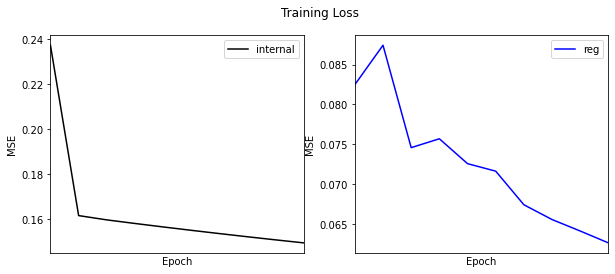

In [48]:
decoders = [x for x in rnn.decoders.readouts if x.task == 'classification']
readout_labels = [x.label+'-'+x.task for x in decoders]
decoder_losses = {k: [] for k in readout_labels}
for batch, losses in train_results['dec_loss'].items():
    for r_label in readout_labels:
        decoder_losses[r_label].append(losses[r_label]['raw-MSE'])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Training Loss")
x_ticks = np.arange(n_epochs)+1
ax[0].plot(np.arange(n_epochs)+1, train_results['losses'], 'k', label="internal")
ax[0].set_xticks(x_ticks[::10]-1)
ax[0].set_xlim([x_ticks.min(), x_ticks.max()])
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("MSE")
ax[0].legend()
for idx, (k, v) in enumerate(decoder_losses.items()):
    label = '-'.join(k.split('-')[:-1])
    ax[1].plot(np.arange(n_epochs)+1, v, color='b', label=label)
ax[1].set_xticks(x_ticks[::10]-1)
ax[1].set_xlim([x_ticks.min(), x_ticks.max()])
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("MSE")
ax[1].legend()

## 9.4. Profiling

* Noise-driven dynamics
* Self-sustaining activity
* Transfer functions
* Stability, ...
